In [1]:
import os
import pandas as pd
import numpy as np
from scipy.stats import spearmanr, pearsonr
import matplotlib.pyplot as plt

/home/xxy/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


---

For this part, we make GPT4.0 just output quality score without any explanation.

## 1. training prompt
![training](ref_prompt1.png)

## scoring prompt
![scoring](score_prompt1.png)

(169,) (169,)
PLCC: 0.4335
SRCC: 0.4004


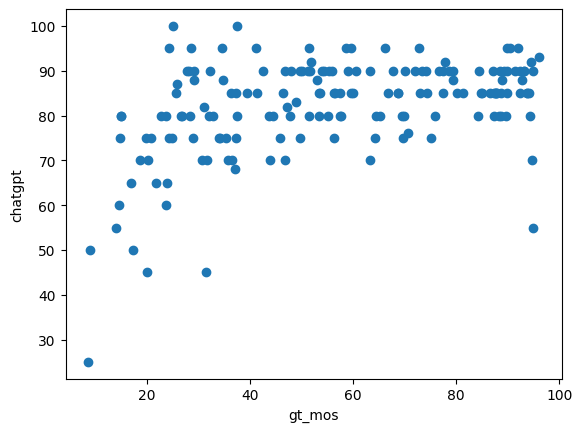

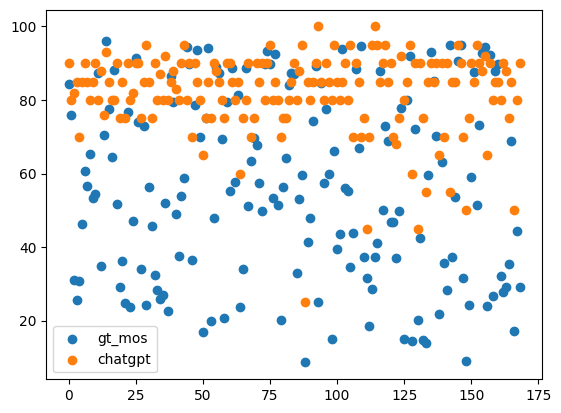

In [6]:
df = pd.read_csv("gpt_score3.csv")

# extract the third column and transform to numpy array
scores = df.iloc[:, 2].to_numpy()
# extract non nan values
scores = scores[~np.isnan(scores)]

gt_scores = []
frames = []
with open('LIVE_r2.txt', 'r') as f:
    lines = f.readlines()
    for l in lines:
        l = l.strip()
        if 'jp2k' in l:
            frame = os.path.basename(l.split(',')[-2]).rstrip('.bmp').lstrip('img')
            s = l.split(',')[-1]
            gt_scores.append(float(s))
            frames.append(int(frame))

gt_scores = np.array(gt_scores)
frames = np.array(frames)
gt_mos = 100-gt_scores

gtp_scores = scores[frames-1]

print(gt_mos.shape, gtp_scores.shape)
plcc, _ = pearsonr(gt_mos, gtp_scores)
srcc, _ = spearmanr(gt_mos, gtp_scores)
print("PLCC: {:.4f}".format(plcc))
print("SRCC: {:.4f}".format(srcc))

# plot scatter plots
plt.figure()
plt.scatter(gt_mos, gtp_scores)
plt.xlabel('gt_mos')
plt.ylabel('chatgpt')
plt.show()
plt.figure()
plt.scatter(np.arange(gt_mos.shape[0]), gt_mos, label='gt_mos')
plt.scatter(np.arange(gtp_scores.shape[0]), gtp_scores, label='chatgpt')
plt.legend()
plt.show()

---

For this part, we ask the GPT4.0 to explain why it give each score

# 1. training prompt
![training](ref_prompt2.png)

# 2. scoring prompt
![scoring](score_prompt2.png)

# 3. answer
![answer](answer.png)

[84.487  75.9097 31.0091 25.6021 30.7708 46.4213 60.6233 56.5774 65.197
 53.3159 54.3205 87.3079 34.7689 70.6078 96.1109 77.5388 64.4003 88.2854
 51.5983 29.0509 36.3551 24.7991 76.7412 23.7133 47.2144 91.3865 74.1458
 34.1424 73.0396 24.2189 56.3037 45.8258 32.3032 28.3803 25.8544 26.9083
 51.9111 22.6749 86.4989] [95. 75. 70. 85. 90. 85. 95. 90. 82. 90. 95. 85. 85. 80. 92. 85. 80. 90.
 93. 87. 90. 85. 93. 80. 80. 85. 85. 70. 90. 80. 85. 70. 80. 88. 90. 85.
 95. 85. 85.]
(39,) (39,)
PLCC: 0.2473
SRCC: 0.2456


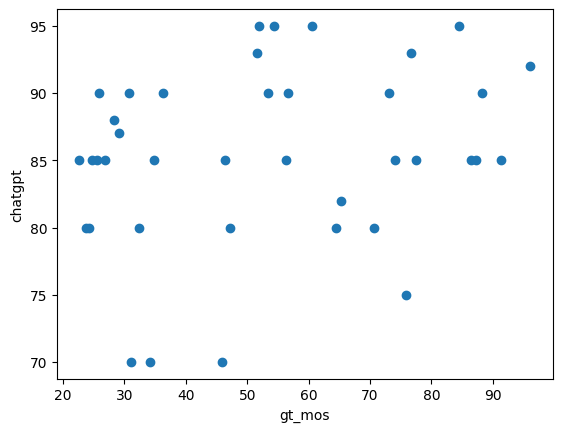

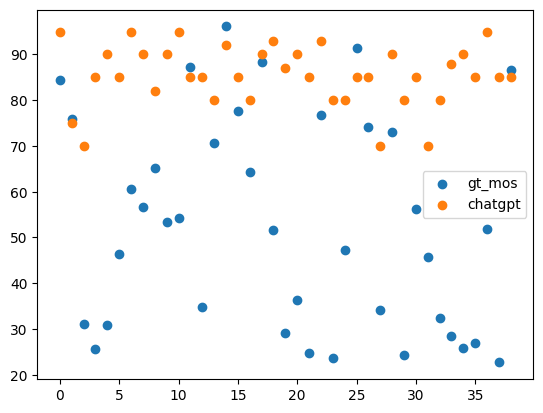

In [8]:
scores2 = df.iloc[:, 4].to_numpy()
# extract non nan values
scores2 = scores2[~np.isnan(scores2)]

gt_mos2 = gt_mos[:39]
frames2 = frames[:39]
gtp_scores2 = scores2[frames2-1]
print(gt_mos2, gtp_scores2)
# gt_mos = (gt_mos-gt_mos.min())/(gt_mos.max()-gt_mos.min())
# gtp_scores = (gtp_scores-gtp_scores.min())/(gtp_scores.max()-gtp_scores.min())

print(gt_mos2.shape, gtp_scores2.shape)
plcc2, _ = pearsonr(gt_mos2, gtp_scores2)
srcc2, _ = spearmanr(gt_mos2, gtp_scores2)
print("PLCC: {:.4f}".format(plcc2))
print("SRCC: {:.4f}".format(srcc2))

# plot scatter plots
plt.figure()
plt.scatter(gt_mos2, gtp_scores2)
plt.xlabel('gt_mos')
plt.ylabel('chatgpt')
plt.show()

plt.figure()
plt.scatter(np.arange(gt_mos2.shape[0]), gt_mos2, label='gt_mos')
plt.scatter(np.arange(gtp_scores2.shape[0]), gtp_scores2, label='chatgpt')
plt.legend()
plt.show()

---

For this part, we ask the GPT4.0 to explain why it give each score ranging 1 to 5 as LIVE2 did

# 1. training prompt
![training](ref_prompt3.png)

# 2. scoring prompt
![scoring](score_prompt3.png)

# 3. answer
![answer](answer2.png)

[84.487  75.9097 31.0091 25.6021 30.7708 46.4213 60.6233 56.5774 65.197
 53.3159 54.3205 87.3079 34.7689 70.6078 96.1109 77.5388 64.4003 88.2854
 51.5983 29.0509 36.3551 24.7991 76.7412 23.7133 47.2144 91.3865 74.1458
 34.1424 73.0396 24.2189 56.3037 45.8258 32.3032 28.3803 25.8544 26.9083
 51.9111 22.6749 86.4989] [ 80.  70.  60.  80.  60.  90.  70.  50.  40.  80. 100.  60.  80.  60.
  70. 100.  80.  60. 100.  80.  60.  70.  90.  50.  80. 100.  80.  40.
  60.  90.  80.  60.  90.  90.  80.  70.  90.  60.  90.]
(39,) (39,)
PLCC: 0.1165
SRCC: 0.1092


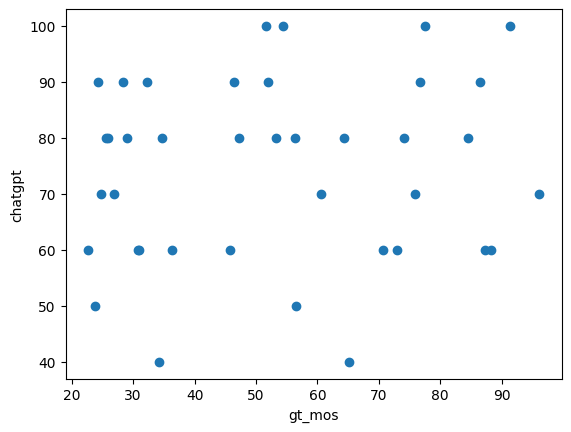

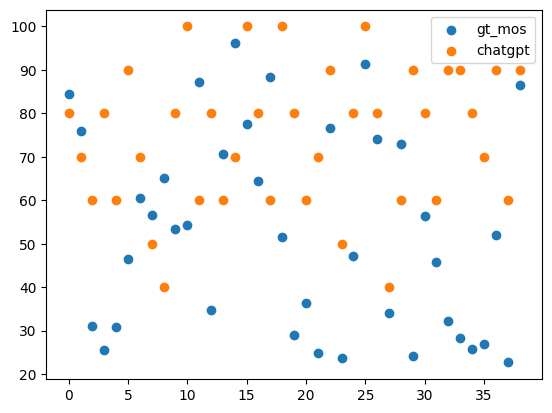

In [10]:
scores3 = df.iloc[:, 6].to_numpy()
# extract non nan values
scores3 = scores3[~np.isnan(scores3)]
scores3 = scores3*20

gt_mos3 = gt_mos[:39]
frames3 = frames[:39]
gtp_scores3 = scores3[frames3-1]
print(gt_mos3, gtp_scores3)
# gt_mos = (gt_mos-gt_mos.min())/(gt_mos.max()-gt_mos.min())
# gtp_scores = (gtp_scores-gtp_scores.min())/(gtp_scores.max()-gtp_scores.min())

print(gt_mos3.shape, gtp_scores3.shape)
plcc3, _ = pearsonr(gt_mos3, gtp_scores3)
srcc3, _ = spearmanr(gt_mos3, gtp_scores3)
print("PLCC: {:.4f}".format(plcc3))
print("SRCC: {:.4f}".format(srcc3))

# plot scatter plots
plt.figure()
plt.scatter(gt_mos3, gtp_scores3)
plt.xlabel('gt_mos')
plt.ylabel('chatgpt')
plt.show()

plt.figure()
plt.scatter(np.arange(gt_mos3.shape[0]), gt_mos3, label='gt_mos')
plt.scatter(np.arange(gtp_scores3.shape[0]), gtp_scores3, label='chatgpt')
plt.legend()
plt.show()